In [ ]:
#ESTE PROGRAMA CONCISTE EN LA ELABORACION DE UNA RED NEURONAL CON EL OBJETIVO DE CREAR UNA RED NEURONAL CAPAZ DE DISTINGUIR 
#Y CLASIFICAR RADIOGRAFIAS DE TORAX  y determinar su ESTATUS MEDICO

#Etiquetas: Neumonia, Saludables

In [ ]:
# -*- coding: utf-8 -*-
#Este programa fue elaborado por Jesus Eduardo Loera Casas 1898887

#Importamos las librerias

from google.colab import files #librería para subir imagenes
import zipfile #librería para manejar archivos .zip
import io
import cv2
import numpy as np 
import os #librería para movernos por el os
import matplotlib.pyplot as plt
from __future__ import absolute_import, division, print_function, unicode_literals
#librerías de tensorflow para la red neuronal
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import tensorflow.keras.optimizers as Optimizer

In [ ]:
#PARA INICIALIZAR GPU DE GOOGLE PARA PROCESOS MAS RAPIDO EJECUTAR ESTA CELDA

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Descomprimimos el .zip
data = zipfile.ZipFile('/content/drive/My Drive/Entrenamiento.zip', 'r') #CAMBIAR NOMBRE DE DIRECCION
data.extractall()

In [ ]:
#CREAMOS LA DATA NECESARIA PARA TRAIN Y TEST

In [ ]:
#PARA GUARDAR LAS RADIOGRAFIAS EN MATRICES PRIMERAMENTE DEFINIMOS EL TAMAÑO DE LAS MATRICES
#ESTO PERMITE ALMACENAR SU INFORMACION EN MATRICES NUMERICAS
img_size_1=112
img_size_2=120

In [ ]:
#Hacemos una lista de radiografias con neumonia para entrenamiento
neumonia_train_folder_path='/content/Data/train/neumonia_train'
neumonia_train=[]

for img in os.listdir(neumonia_train_folder_path):
    img = cv2.imread(os.path.join(neumonia_train_folder_path,img))
    img_resize= cv2.resize(img,(img_size_1,img_size_2))
    neumonia_train.append(img_resize)
    num_etiquetas_neumonia_train=num_etiquetas_neumonia_train+1

#Convertimos la lista en array
neumonia_train = np.array(neumonia_train)

In [ ]:
#Hacemos una lista de radiografias con pulmones normales para entrenar 
normales_train_folder_path='/content/Data/train/normal_train'
normales_train=[]

#Hacemos un contador de las radiografias sin neumonia, para despues crear sus respectivas etiquetas
num_etiquetas_normales_train=0

for img in os.listdir(normales_train_folder_path):
    img = cv2.imread(os.path.join(normales_train_folder_path,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size_1,img_size_2))
    normales_train.append(img_resize)
    num_etiquetas_normales_train=num_etiquetas_normales_train+1

#Convertimos la lista en array
normales_train = np.array(normales_train)

In [ ]:
#Hacemos una lista de radiografias con pulmones con neumonia para test 
neumonia_test_folder_path='/content/Data/test/neumonia_test' 
neumonia_test=[]

#Hacemos un contador de las radiografias con neumonia, para despues crear sus respectivas etiquetas
num_etiquetas_neumonia_test=0

for img in os.listdir(neumonia_test_folder_path):
    img = cv2.imread(os.path.join(neumonia_test_folder_path,img))
    img_resize= cv2.resize(img,(img_size_1,img_size_2))
    neumonia_test.append(img_resize)
    num_etiquetas_neumonia_test=num_etiquetas_neumonia_test+1

#Convertimos la lista en array
neumonia_test = np.array(neumonia_test)

In [ ]:
#Hacemos una lista de radiografias con pulmones sanos para test 
normales_test_folder_path='/content/Data/test/normal_test'
normales_test=[]

#Hacemos un contador de las radiografias sin neumonia, para despues crear sus respectivas etiquetas
num_etiquetas_normales_test=0

for img in os.listdir(normales_test_folder_path):
    img = cv2.imread(os.path.join(normales_test_folder_path,img))
    img_resize= cv2.resize(img,(img_size_1,img_size_2))
    normales_test.append(img_resize)
    num_etiquetas_normales_test=num_etiquetas_normales_test+1

#Convertimos la lista en array
normales_test = np.array(normales_test)

(120, 112, 3)


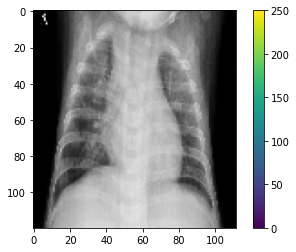

<Figure size 432x288 with 0 Axes>

In [ ]:
#Aqui mostramos una de las radiografías guardadas en los areglos de forma aleatoria

print(neumonia_train[4].shape)
plt.figure()
plt.imshow(np.squeeze(neumonia_train[2]))
plt.colorbar()
plt.grid(False)
plt.show()
plt.clf()

In [ ]:
#Creamos una sola lista con las imagenes de train
images_train_list=np.concatenate([neumonia_train, normales_train])
#Convertimos la lista a array
images_train_list=np.array(images_train_list)

In [ ]:
#Creamos una sola lista con las imagenes de test
images_test_list=np.concatenate([neumonia_test, normales_test])
#Convertimos la lista a array
images_test_list=np.array(images_test_list)

In [ ]:
#Ahora creamos las etiquetas de train (labels) de cada imagen
etiquetas_neumonia_train=np.repeat(0, (len(neumonia_train))) #label para positivo para neumonia, que asociamos con 0
etiquetas_normales_train=np.repeat(1, (len(normales_train))) #label para negativo para neumonia, que asociamos con 1

#Ahora concatenamos las etiquetas
etiquetas_train_list=np.concatenate([etiquetas_neumonia_train, etiquetas_normales_train])
#Convertimos la lista a array
etiquetas_train_list=np.array(etiquetas_train_list)

In [ ]:
#Ahora creamos las etiquetas de test (labels) de cada imagen, para evaluar la efectividad del modelo
etiquetas_neumonia_test=np.repeat(0, (len(neumonia_test))) #label para positivo para neumonia, que asociamos con 0
etiquetas_normales_test=np.repeat(1, (len(normales_test))) #label para negativo para neumonia, que asociamos con 1

#Ahora concatenamos las etiquetas
etiquetas_test_list=np.concatenate([etiquetas_neumonia_test, etiquetas_normales_test])
#Convertimos la lista a array
etiquetas_test_list=np.array(etiquetas_test_list)

In [ ]:
#Clasificamos los nombres de etiquetas
class_names=['Neumonia','Saludables']

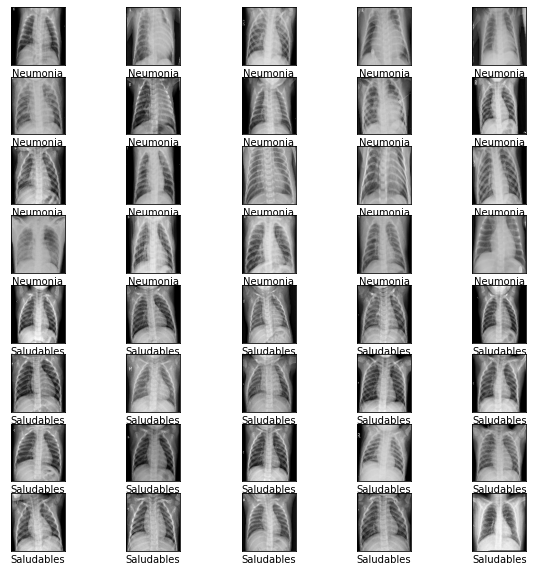

<Figure size 432x288 with 0 Axes>

In [ ]:
#Ahora imprimimos algunas etiquetas

plt.figure(figsize=(10,10))
for i in range(3948,3948+40):
    plt.subplot(8,5,i-3948+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_train_list[i])
    plt.xlabel(class_names[etiquetas_train_list[i]])
plt.show()
plt.clf()

In [ ]:
#Diseñamos la red neuronal

#Aquí determinaremos la arquetectura de la red neuronal
#Input de la red: Matriz 120X112 que llega a la red
#Capa oculta: 64 neuronas
#Output de la red: 2 neuronas (1 o 0)

model = tf.keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(120, 112,3))) #Primera capa de inputs se le dice que van a entrar imagenes en matrices de 150X150 (el 3 es por la propiedad de poseer color)
model.add(tf.keras.layers.Dense(64, activation='relu'))  #Capa 2 de 128 neuronas 
model.add(tf.keras.layers.Dense(2, activation='softmax')) #Capa 3 de clasificación

In [ ]:
#Compilamos el modelo

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Determinamos el modelo de optimización: ADAM
#Determinamos la función de perdida: sparse categorical cross entropy
#Determinamos su metrica: Accuracy

In [ ]:
#Entrenamos el modelo
print('El modelo ha empezado su entrenamiento')
history=model.fit(images_train_list, etiquetas_train_list, epochs=50, batch_size=50)

#Entrenamos el modelo con las imagenes de entrenamiento y sus etiquetas
#El entrenamientos de grupos de 50 
#Sen entrenara 50 epocas

print('El modelo ha terminado su entrenamiento')

El modelo ha empezado su entrenamiento
Epoch 1/50
107/107 [==============================] - 0s 3ms/step - loss: 438.4259 - accuracy: 0.8273
Epoch 2/50
107/107 [==============================] - 0s 3ms/step - loss: 84.9349 - accuracy: 0.8977
Epoch 3/50
107/107 [==============================] - 0s 3ms/step - loss: 71.8210 - accuracy: 0.9113
Epoch 4/50
107/107 [==============================] - 0s 3ms/step - loss: 86.9977 - accuracy: 0.9126
Epoch 5/50
107/107 [==============================] - 0s 3ms/step - loss: 56.3984 - accuracy: 0.9248
Epoch 6/50
107/107 [==============================] - 0s 3ms/step - loss: 43.0501 - accuracy: 0.9348
Epoch 7/50
107/107 [==============================] - 0s 3ms/step - loss: 40.7223 - accuracy: 0.9358
Epoch 8/50
107/107 [==============================] - 0s 3ms/step - loss: 34.1875 - accuracy: 0.9399
Epoch 9/50
107/107 [==============================] - 0s 3ms/step - loss: 38.1303 - accuracy: 0.9348
Epoch 10/50
107/107 [==============================

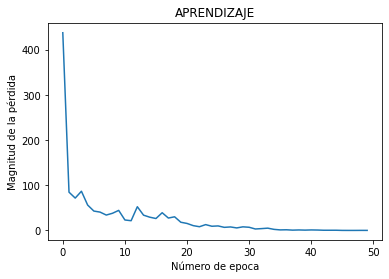

<Figure size 432x288 with 0 Axes>

In [ ]:
#Ahora vemos los resultados del entrenamiento graficando el la perdida en funcion de la epoca, para ver el aprendizaje

plt.xlabel('Número de epoca')
plt.ylabel('Magnitud de la pérdida')
plt.title('APRENDIZAJE')
plt.plot(history.history['loss'])
plt.show()
plt.clf()

In [ ]:
#Realizamos las predicciones
y_test=model.predict(images_test_list)
print(y_test)


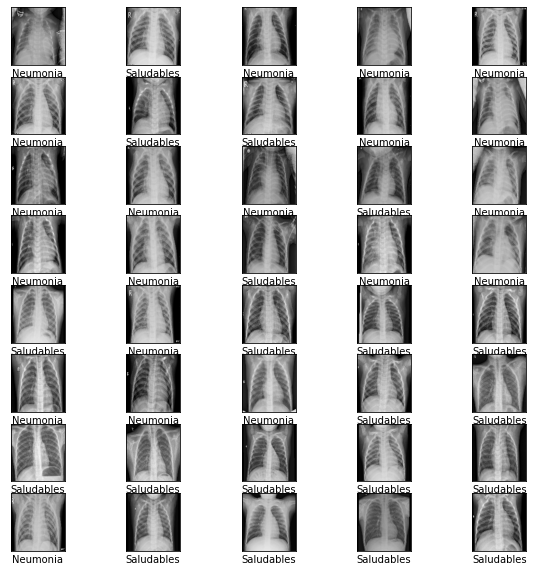

<Figure size 432x288 with 0 Axes>

In [ ]:
#Ahora visualizamos las predicciones
plt.figure(figsize=(10,10))
for i in range(370, 370+40):
    plt.subplot(8,5,i+1-370)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_test_list[i])
    #, cmap=plt.cm.binary
    plt.xlabel(class_names[np.argmax(y_test[i])])
plt.show()
plt.clf()

In [ ]:
# AHORA COMPROBAMOS LA EFECTIVIDAD DE LA RED NEURONAL

Aciertos=0
for i in range (len(etiquetas_test_list)):
  if (etiquetas_test_list[i]==np.argmax(y_test[i])):
    Aciertos=Aciertos+1

Efectividad=(Aciertos/len(etiquetas_test_list))*100

print('La efectividad de la red neuronal es: '+ str(Efectividad)+'%')

La efectividad de la red neuronal es: 83.97435897435898%


In [ ]:
# Guardar el Modelo
model.save('Red_Neuronal_Neumonia_84%.h5')

# Recrea exactamente el mismo modelo solo desde el archivo
#new_model = keras.models.load_model('path_to_my_model.h5')